In [1]:
import pandas as pd
import numpy as np
import uproot

import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'uproot'

In [4]:
data = uproot.open('../data/raw/cosmic.0008.03420_03427_v4.root')

In [1]:
!pip install root_numpy

     |################################| 520 kB 4.0 MB/s eta 0:00:01
  Created wheel for root-numpy: filename=root_numpy-4.8.0-cp36-cp36m-linux_x86_64.whl size=1835897 sha256=e8f095fb213d7df4a06003401cfe8e78e521bb221e54db044293de10d9c8be6a
  Stored in directory: /home/user/.cache/pip/wheels/53/b5/42/5c98da0d83a1d0c25ed93c449b34b462f8aeb778ad229b4bc4
Successfully built root-numpy


In [10]:
!ls /home/user/root/lib/

ASImage.pcm			   libProofBench.so.6.20.04
ASImageGui.pcm			   libProofDraw.so
Cling_Runtime.pcm		   libProofDraw.so.6.20
Cling_Runtime_Extra.pcm		   libProofDraw.so.6.20.04
Core.pcm			   libProofPlayer.so
EG.pcm				   libProofPlayer.so.6.20
EGPythia8.pcm			   libProofPlayer.so.6.20.04
Eve.pcm				   libProofx.so
FFTW.pcm			   libProofx.so.6.20
FITSIO.pcm			   libProofx.so.6.20.04
FitPanel.pcm			   libPyMVA.so
Foam.pcm			   libPyMVA.so.6.20
Fumili.pcm			   libPyMVA.so.6.20.04
GX11.pcm			   libPyROOT.so
GX11TTF.pcm			   libPyROOT.so.6.20
Gdml.pcm			   libPyROOT.so.6.20.04
Ged.pcm				   libQuadp.so
GenVector.pcm			   libQuadp.so.6.20
Genetic.pcm			   libQuadp.so.6.20.04
Geom.pcm			   libRCsg.so
GeomBuilder.pcm			   libRCsg.so.6.20
GeomPainter.pcm			   libRCsg.so.6.20.04
Gpad.pcm			   libRDAVIX.so
Graf.pcm			   libRDAVIX.so.6.20
Graf3d.pcm			   libRDAVIX.so.6.20.04
Gui.pcm				   libRGL.so
GuiBld.pcm			   libRGL.so.6.20
GuiHtml.pcm			   libRGL.so.6.20.04
Gviz3d.pcm			   libRHTTP.so
Hbook.pcm

In [ ]:
$ sudo ln -s /opt/local/lib/root/libPyROOT.so /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7


In [1]:
import sys
sys.path.append('/home/user/root/lib/')

import root_numpy

ImportError: dynamic module does not define module export function (PyInit_libPyROOT)

In [3]:
!conda install -c conda-forge root_numpy -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / ^C
\ 

In [2]:
!pip install root_pandas

  Created wheel for root-pandas: filename=root_pandas-0.7.0-py3-none-any.whl size=8804 sha256=319e799cacb83d78d588c3a5477b09e12adb802f162711e6ec244b322bae0720
  Stored in directory: /home/user/.cache/pip/wheels/d9/c6/2f/ac7ab151b63bc97533ddceb8dfc15d3a492a71ea778adc36cd
Successfully built root-pandas


In [3]:
import root_numpy

ModuleNotFoundError: No module named 'root_numpy'

In [7]:
!ls $HOME/root/bindings/pyroot/

CMakeLists.txt	JupyROOT  _pythonization.py  cppyy.py  inc  test
JsMVA		ROOT.py   _rdf_utils.py      doc       src


In [5]:
import libPyROOT

ModuleNotFoundError: No module named 'libPyROOT'

In [3]:
from root_pandas import read_root
from glob import glob
import pandas as pd
from matplotlib.pyplot import *
%matplotlib inline
from numpy import *
from matplotlib.colors import LogNorm
from matplotlib.patches import *
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
# import b2plot
#style.use('belle2')

ModuleNotFoundError: No module named 'ROOT'

In [3]:
#df = read_root("cosmic.0008.03427.root")

#df = read_root("b.root")
df  = read_root("cosmic.0008.03420_03427_v4.root",columns=["Channel", "ADC", "Board", "Nhit", "Asic"])
#dfm = read_root("mcmc.root",columns=["Channel", "ADC", "Board", "Nhit", "Asic"]) # no cross talk


In [4]:
dfm = read_root("mcmc.root",columns=["Channel", "ADC", "Board", "Nhit", "Asic","Track"]) # no cross talk
dfm2 = read_root("mcmc_xtalk.root",columns=["Channel", "ADC", "Board", "Nhit", "Asic","Track"])
#dfm2 = read_root("mctt.root",columns=["Channel", "ADC", "Board", "Nhit", "Asic","Track"])
#mc3.root

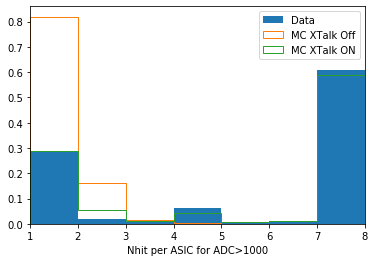

In [5]:
xlim(1,8)
h = hist(df[df.ADC_ADC_Sig>1000].Nhit,8,(0,8),density=True,label='Data')
h = hist(dfm[dfm.ADC_ADC_Sig>1000].Nhit,8,(0,8),density=True,label='MC XTalk Off',histtype='step')
h = hist(dfm2[dfm2.ADC_ADC_Sig>1000].Nhit,8,(0,8),density=True,histtype='step',label='MC XTalk ON')
xlabel('Nhit per ASIC for ADC>1000')
legend()
savefig("xtalk_test.png")